In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle

In [7]:
NAME = '100px-Unexponentiated-fbm-CNN'

In [8]:
pickle_in = open('Training/X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('Training/y.pickle','rb')
y = pickle.load(pickle_in)

In [9]:
X = X/255.0

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())
model.add(Dense(64))

In [14]:
model.add(Dense(1))

In [15]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [16]:
model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])

In [ ]:
model.fit(X,y, batch_size=32, epochs=3, validation_split = 0.3, callbacks = [tensorboard])

Train on 14000 samples, validate on 6000 samples
Epoch 1/3
 6816/14000 [=============>................] - ETA: 21:09 - loss: 0.0925 - acc: 0.0000e+00

In [11]:
pickle_in = open('Testing/X_test.pickle','rb')
X_test = pickle.load(pickle_in)

pickle_in = open('Testing/y_test.pickle','rb')
y_test = pickle.load(pickle_in)

X_test /= 255.0

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

1000/1000 [==============================] - 57s 57ms/step
0.0106567735597
0.0


In [14]:
import time

In [15]:
model.save('100px-unexponentiated-fbm-CNN-{}.model'.format(int(time.time())))

In [17]:
predictions = model.predict(X_test)

In [21]:
print(predictions.size)

1000


In [23]:
import matplotlib.pyplot as plt

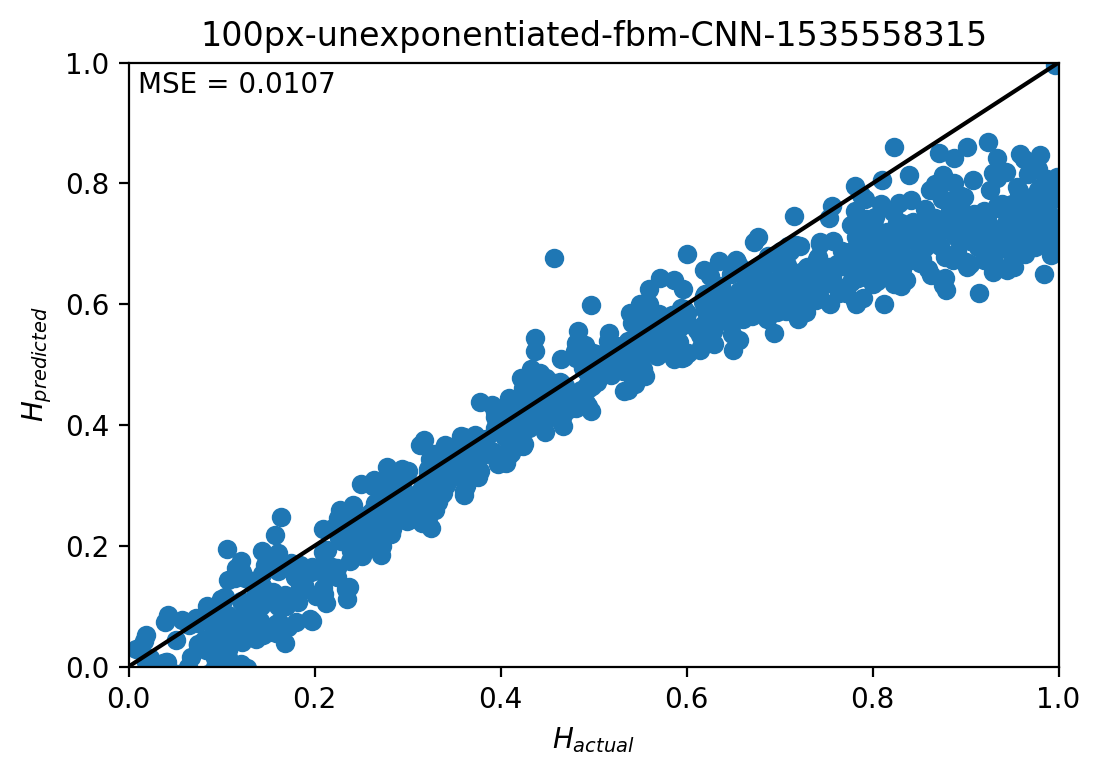

In [31]:
plt.figure(dpi=200)
plt.scatter(y_test,predictions)
plt.plot([0,1],[0,1],c='k')
plt.text(0.01, 0.95, 'MSE = '+ '{:.3g}'.format(val_loss))
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.title('100px-unexponentiated-fbm-CNN-{}'.format(int(time.time())))
plt.savefig('100px-unexponentiated-fbm-CNN-{}.png'.format(int(time.time())))
plt.show()